In [411]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, classification_report, roc_auc_score,
                             mean_absolute_error, mean_squared_error)

In [413]:
#loading the csv file
df = pd.read_csv('Cardiovascular_Disease_Dataset.csv')
df

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,9949544,48,1,2,139,349,0,2,183,1,5.6,2,2,1
996,9953423,47,1,3,143,258,1,1,98,1,5.7,1,0,0
997,9965859,69,1,0,156,434,1,0,196,0,1.4,3,1,1
998,9988507,45,1,1,186,417,0,1,117,1,5.9,3,2,1


In [415]:
df.shape

(1000, 14)

In [417]:
df.columns.tolist()

['patientid',
 'age',
 'gender',
 'chestpain',
 'restingBP',
 'serumcholestrol',
 'fastingbloodsugar',
 'restingrelectro',
 'maxheartrate',
 'exerciseangia',
 'oldpeak',
 'slope',
 'noofmajorvessels',
 'target']

In [419]:
df.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


In [421]:
# Display dataset information
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB
None


In [423]:
missing_values = df.isnull().sum()
print(missing_values)
print(f"\nTotal missing values: {missing_values.sum()}")

patientid            0
age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
dtype: int64

Total missing values: 0


In [425]:
df_processed = df.drop('patientid', axis=1)
print(f"New shape: {df_processed.shape}")

New shape: (1000, 13)


In [427]:
# Separate features (X) and target variable (y)
X = df_processed.drop('target', axis=1)
y = df_processed['target']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")


Features shape: (1000, 12)
Target shape: (1000,)


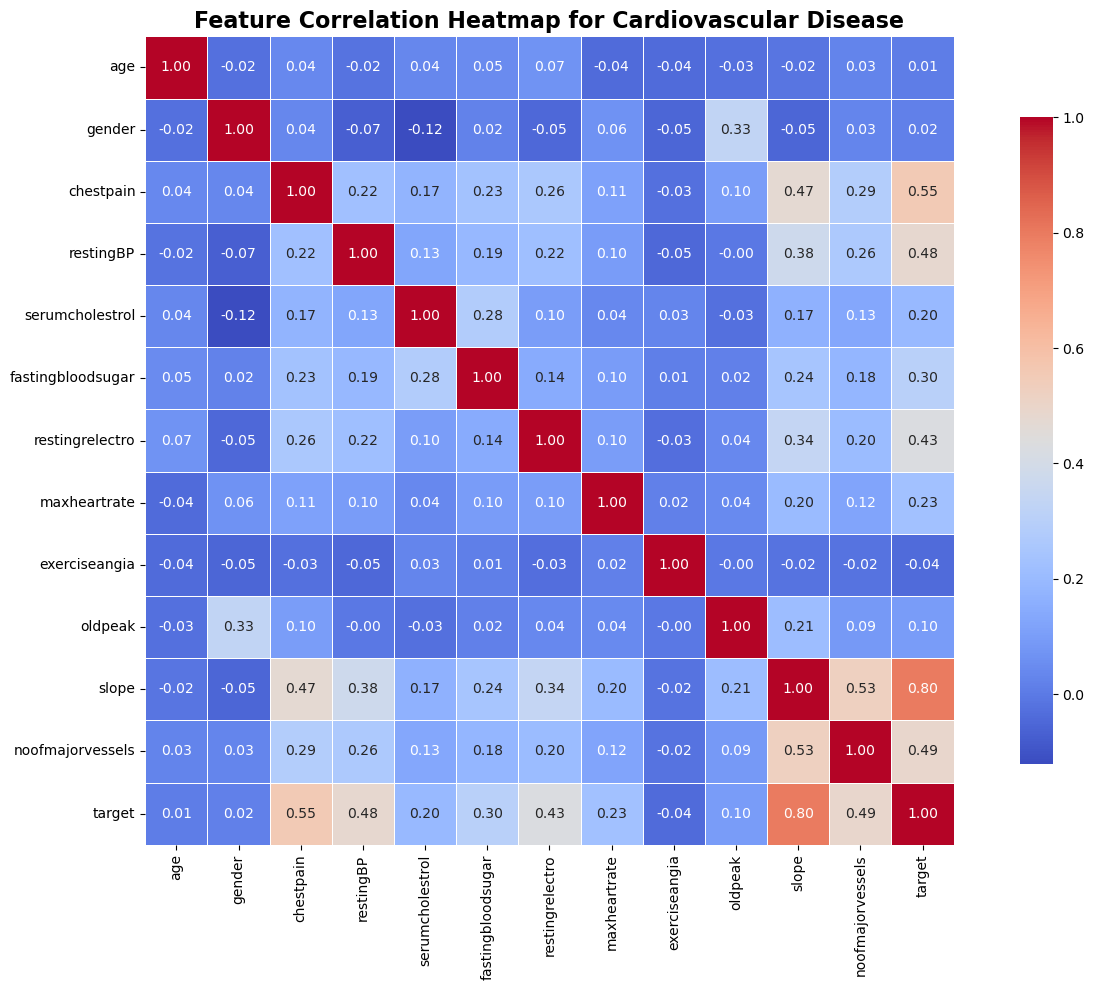

In [429]:
# Create correlation matrix
correlation_matrix = df_processed.corr()

# Visualize correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap for Cardiovascular Disease', 
          fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


C:\Users\ACER\AppData\Local\Temp\ipykernel_19868\2053253585.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette=['#C2E1FC', '#FFC2D9'])


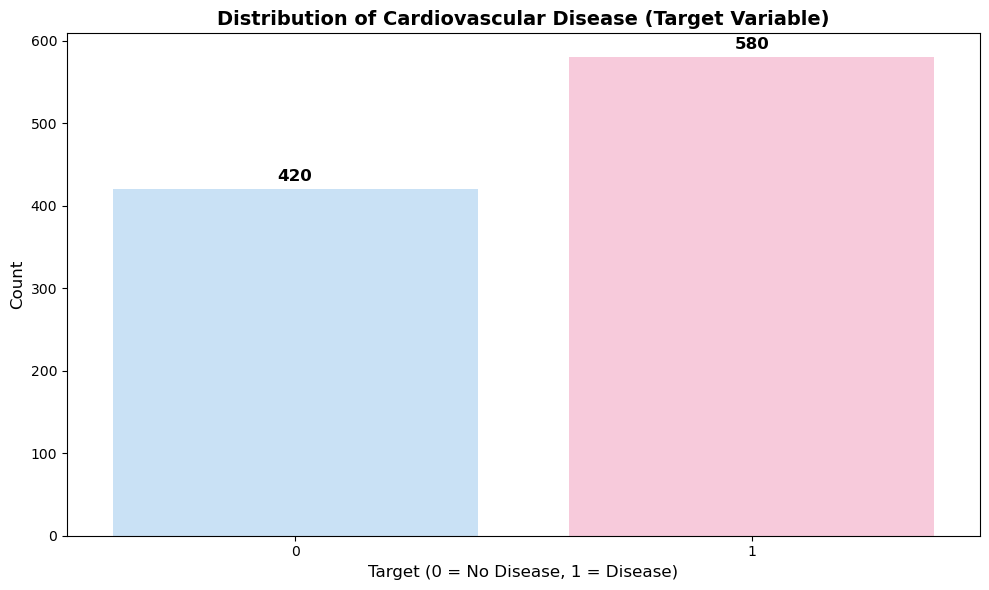

No Disease (0): 420 (42.0%)
Disease (1): 580 (58.0%)


In [431]:
# Visualize target variable distribution
plt.figure(figsize=(10, 6))
target_counts = y.value_counts().sort_index()

# Create count plot with explicit order
sns.countplot(x=y, palette=['#C2E1FC', '#FFC2D9'])
plt.title('Distribution of Cardiovascular Disease (Target Variable)', fontsize=14, fontweight='bold')
plt.xlabel('Target (0 = No Disease, 1 = Disease)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add count labels on bars
for i, (index, count) in enumerate(target_counts.items()):
    plt.text(i, count + 10, str(count), ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# Print percentage distribution
print(f"No Disease (0): {target_counts[0]} ({target_counts[0]/len(y)*100:.1f}%)")
print(f"Disease (1): {target_counts[1]} ({target_counts[1]/len(y)*100:.1f}%)")


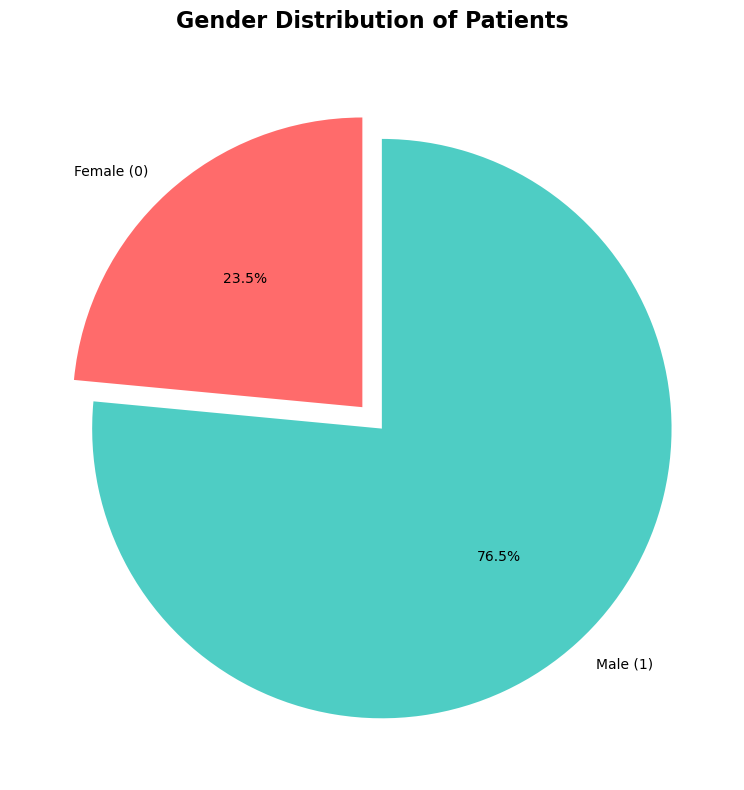

In [433]:
# Gender Distribution of Patients
plt.figure(figsize=(10, 8))
gender_counts = df_processed['gender'].value_counts().sort_index()
colors = ['#FF6B6B', '#4ECDC4']
explode = (0.05, 0.05)  # Slightly separate the slices

plt.pie(gender_counts, labels=['Female (0)', 'Male (1)'], autopct='%1.1f%%',
        startangle=90, colors=colors, explode=explode,)

plt.title('Gender Distribution of Patients', fontsize=16, fontweight='bold', pad=20)
total = len(df_processed)
for i, count in enumerate(gender_counts):
    label = f'\n({count} patients)'
    plt.text(0, 0, '', fontsize=10)

plt.tight_layout()
plt.show()


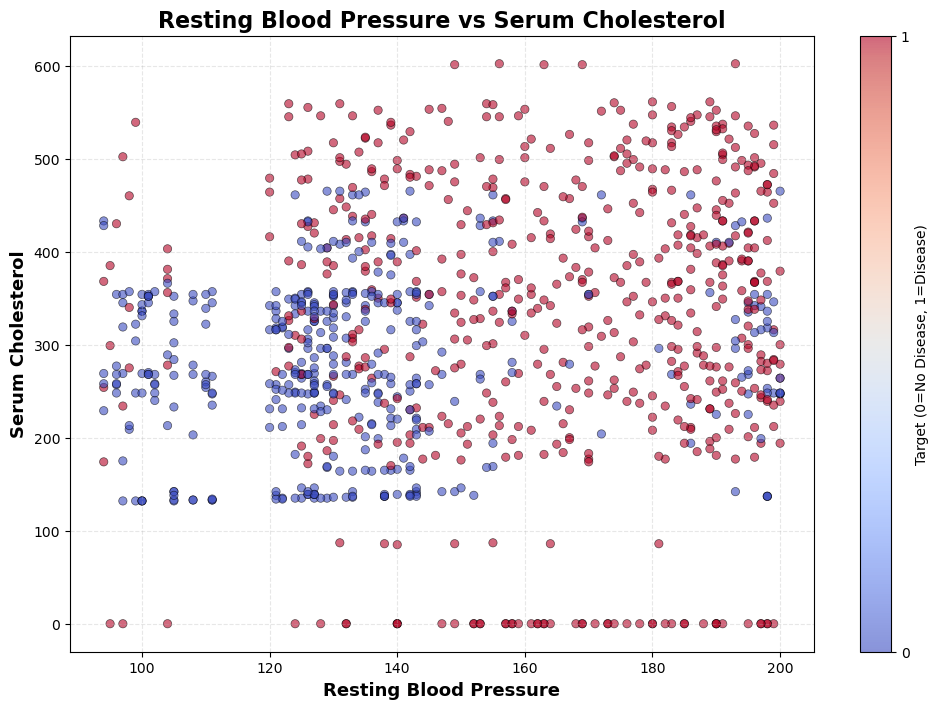

In [435]:
# Scatter plot: Resting Blood Pressure vs Serum Cholesterol
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_processed['restingBP'], df_processed['serumcholestrol'], c=df_processed['target'], cmap='coolwarm', alpha=0.6,
                     edgecolors='black',
                     linewidth=0.5)

plt.colorbar(scatter, label='Target (0=No Disease, 1=Disease)', ticks=[0, 1])
plt.title('Resting Blood Pressure vs Serum Cholesterol', fontsize=16, fontweight='bold')
plt.xlabel('Resting Blood Pressure', fontsize=13, fontweight='bold')
plt.ylabel('Serum Cholesterol', fontsize=13, fontweight='bold')
plt.grid(alpha=0.3, linestyle='--')
plt.show()


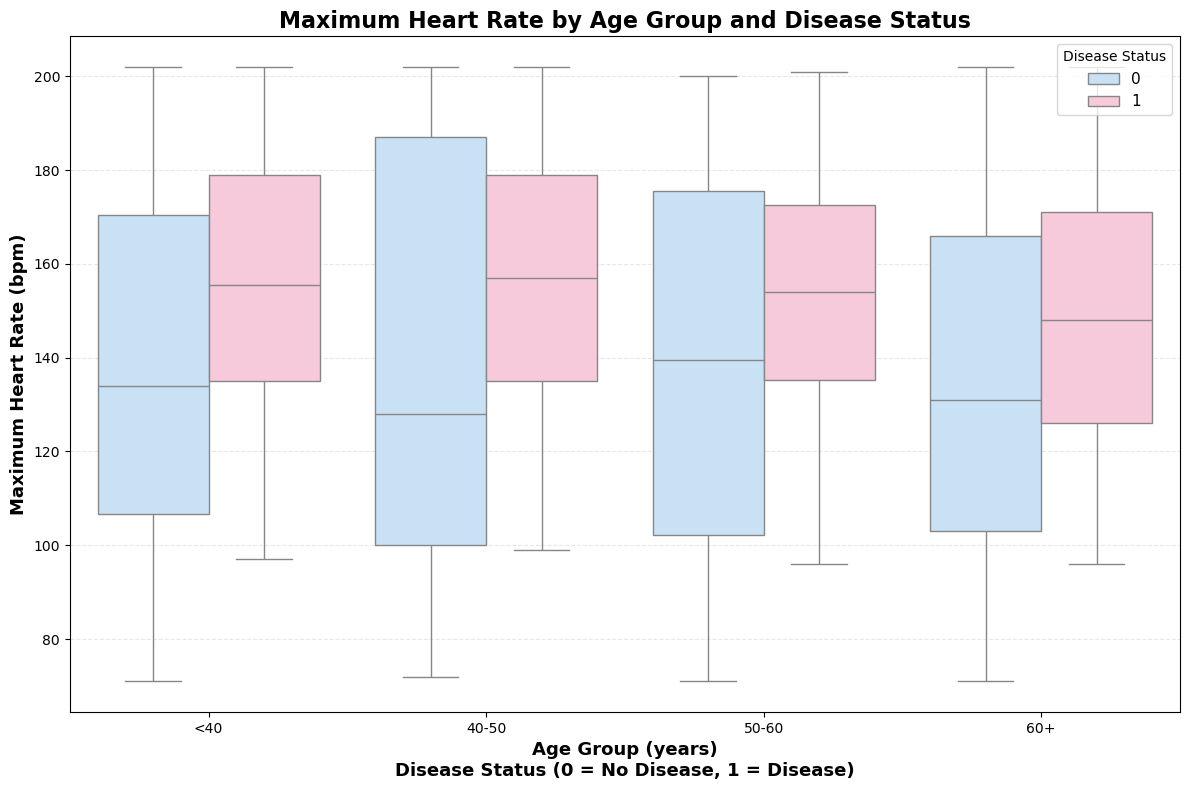

In [437]:
df_temp = df_processed.copy()
df_temp['age_group'] = pd.cut(df_temp['age'], 
                               bins=[0, 40, 50, 60, 100],
                               labels=['<40', '40-50', '50-60', '60+'])

plt.figure(figsize=(12, 8))
sns.boxplot(data=df_temp, x='age_group', y='maxheartrate', hue='target',
            palette={0: '#C2E1FC', 1: '#FFC2D9'})
plt.title('Maximum Heart Rate by Age Group and Disease Status', 
          fontsize=16, fontweight='bold') 
plt.xlabel('Age Group (years)\nDisease Status (0 = No Disease, 1 = Disease)', fontsize=13, fontweight='bold')
plt.ylabel('Maximum Heart Rate (bpm)', fontsize=13, fontweight='bold')
plt.legend(title='Disease Status', loc='upper right', fontsize=11)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()



In [439]:
# Initialize StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print("Features scaled successfully using StandardScaler")
print(f"Scaled features shape: {X_scaled.shape}")


Features scaled successfully using StandardScaler
Scaled features shape: (1000, 12)


In [441]:
# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Dataset splitting!")
print(f"Training set size: {X_train.shape[0]} samples ({(X_train.shape[0]/len(X)*100):.0f}%)")
print(f"Testing set size: {X_test.shape[0]} samples ({(X_test.shape[0]/len(X)*100):.0f}%)")
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")


Dataset splitting!
Training set size: 800 samples (80%)
Testing set size: 200 samples (20%)
Training features shape: (800, 12)
Testing features shape: (200, 12)


In [449]:
# Initialize Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions on test set
y_pred_lr = lr_model.predict(X_test)
y_pred_lr_proba = lr_model.predict_proba(X_test)[:, 1]
print(f"Predictions: {y_pred_lr[:10]}")


Predictions: [0 0 1 1 0 0 1 0 0 1]


In [451]:
# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, 
                                  max_depth=10, min_samples_split=5)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on test set
y_pred_rf = rf_model.predict(X_test)
y_pred_rf_proba = rf_model.predict_proba(X_test)[:, 1]
print(f"Predictions: {y_pred_rf[:10]}")


Predictions: [0 0 1 1 0 0 1 0 0 1]


In [453]:
# Initialize Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42, max_depth=8, 
                                  min_samples_split=10)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions on test set
y_pred_dt = dt_model.predict(X_test)
y_pred_dt_proba = dt_model.predict_proba(X_test)[:, 1]
print(f"Predictions: {y_pred_dt[:10]}")


Predictions: [0 0 1 1 0 0 1 1 0 1]


In [455]:
# Calculate performance metrics
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_precision = precision_score(y_test, y_pred_lr)
lr_recall = recall_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr)
lr_roc_auc = roc_auc_score(y_test, y_pred_lr_proba)

print("LOGISTIC REGRESSION - PERFORMANCE METRICS")
print(f"Accuracy:  {lr_accuracy:.4f} ({lr_accuracy*100:.2f}%)")
print(f"Precision: {lr_precision:.4f} ({lr_precision*100:.2f}%)")
print(f"Recall:    {lr_recall:.4f} ({lr_recall*100:.2f}%)")
print(f"F1-Score:  {lr_f1:.4f} ({lr_f1*100:.2f}%)")
print(f"ROC-AUC:   {lr_roc_auc:.4f} ({lr_roc_auc*100:.2f}%)")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr, target_names=['No Disease', 'Disease']))


LOGISTIC REGRESSION - PERFORMANCE METRICS
Accuracy:  0.9850 (98.50%)
Precision: 0.9829 (98.29%)
Recall:    0.9914 (99.14%)
F1-Score:  0.9871 (98.71%)
ROC-AUC:   0.9982 (99.82%)

Classification Report:
              precision    recall  f1-score   support

  No Disease       0.99      0.98      0.98        84
     Disease       0.98      0.99      0.99       116

    accuracy                           0.98       200
   macro avg       0.99      0.98      0.98       200
weighted avg       0.99      0.98      0.98       200



In [457]:
# Calculate performance metrics
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)
rf_roc_auc = roc_auc_score(y_test, y_pred_rf_proba)

print("RANDOM FOREST - PERFORMANCE METRICS")
print(f"Accuracy:  {rf_accuracy:.4f} ({rf_accuracy*100:.2f}%)")
print(f"Precision: {rf_precision:.4f} ({rf_precision*100:.2f}%)")
print(f"Recall:    {rf_recall:.4f} ({rf_recall*100:.2f}%)")
print(f"F1-Score:  {rf_f1:.4f} ({rf_f1*100:.2f}%)")
print(f"ROC-AUC:   {rf_roc_auc:.4f} ({rf_roc_auc*100:.2f}%)")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['No Disease', 'Disease']))


RANDOM FOREST - PERFORMANCE METRICS
Accuracy:  0.9850 (98.50%)
Precision: 0.9829 (98.29%)
Recall:    0.9914 (99.14%)
F1-Score:  0.9871 (98.71%)
ROC-AUC:   0.9989 (99.89%)

Classification Report:
              precision    recall  f1-score   support

  No Disease       0.99      0.98      0.98        84
     Disease       0.98      0.99      0.99       116

    accuracy                           0.98       200
   macro avg       0.99      0.98      0.98       200
weighted avg       0.99      0.98      0.98       200



In [459]:
# Calculate performance metrics
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt)
dt_recall = recall_score(y_test, y_pred_dt)
dt_f1 = f1_score(y_test, y_pred_dt)
dt_roc_auc = roc_auc_score(y_test, y_pred_dt_proba)

print("DECISION TREE - PERFORMANCE METRICS")
print(f"Accuracy:  {dt_accuracy:.4f} ({dt_accuracy*100:.2f}%)")
print(f"Precision: {dt_precision:.4f} ({dt_precision*100:.2f}%)")
print(f"Recall:    {dt_recall:.4f} ({dt_recall*100:.2f}%)")
print(f"F1-Score:  {dt_f1:.4f} ({dt_f1*100:.2f}%)")
print(f"ROC-AUC:   {dt_roc_auc:.4f} ({dt_roc_auc*100:.2f}%)")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt, target_names=['No Disease', 'Disease']))


DECISION TREE - PERFORMANCE METRICS
Accuracy:  0.9750 (97.50%)
Precision: 0.9744 (97.44%)
Recall:    0.9828 (98.28%)
F1-Score:  0.9785 (97.85%)
ROC-AUC:   0.9881 (98.81%)

Classification Report:
              precision    recall  f1-score   support

  No Disease       0.98      0.96      0.97        84
     Disease       0.97      0.98      0.98       116

    accuracy                           0.97       200
   macro avg       0.98      0.97      0.97       200
weighted avg       0.98      0.97      0.97       200



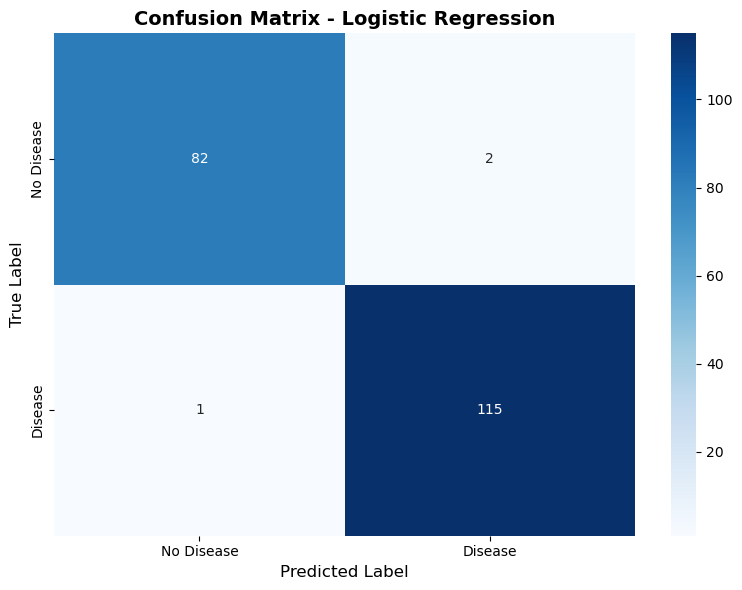

Logistic Regression Accuracy: 98.50%


In [461]:
# Calculate confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix - Logistic Regression', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.tight_layout()
plt.show()

print(f"Logistic Regression Accuracy: {lr_accuracy*100:.2f}%")


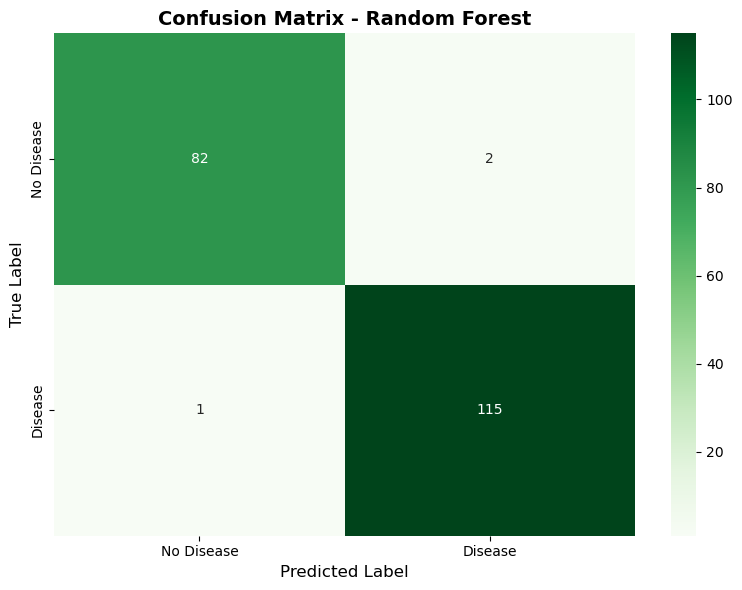

Random Forest Accuracy: 98.50%


In [463]:
# Calculate confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix - Random Forest', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.tight_layout()
plt.show()

print(f"Random Forest Accuracy: {rf_accuracy*100:.2f}%")


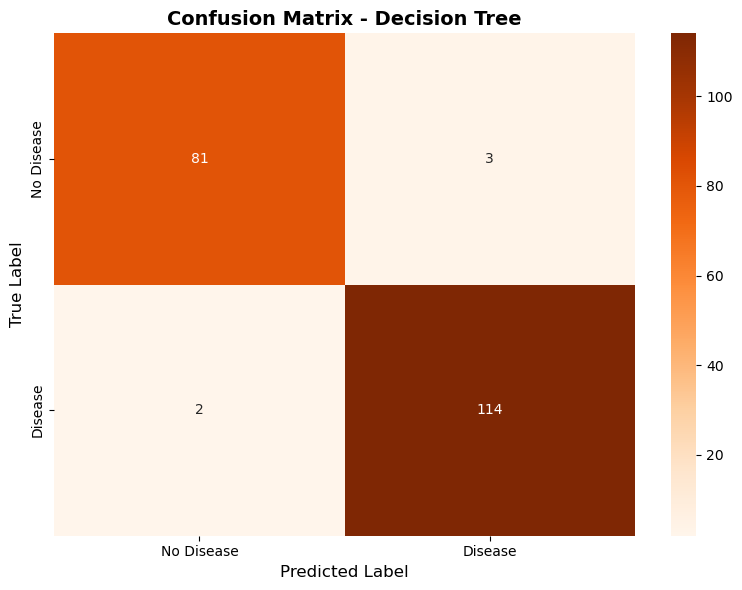

Decision Tree Accuracy: 97.50%


In [465]:
# Calculate confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Oranges', 
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix - Decision Tree', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.tight_layout()
plt.show()

print(f"Decision Tree Accuracy: {dt_accuracy*100:.2f}%")


Random Forest - Feature Importance:
              Feature  Importance
10              slope    0.389228
2           chestpain    0.165486
3           restingBP    0.125914
11   noofmajorvessels    0.071286
4     serumcholestrol    0.066536
6     restingrelectro    0.050054
7        maxheartrate    0.042841
9             oldpeak    0.030556
1              gender    0.019982
5   fastingbloodsugar    0.019574
0                 age    0.016402
8       exerciseangia    0.002142


C:\Users\ACER\AppData\Local\Temp\ipykernel_19868\709627202.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_rf, x='Importance', y='Feature', palette='viridis')


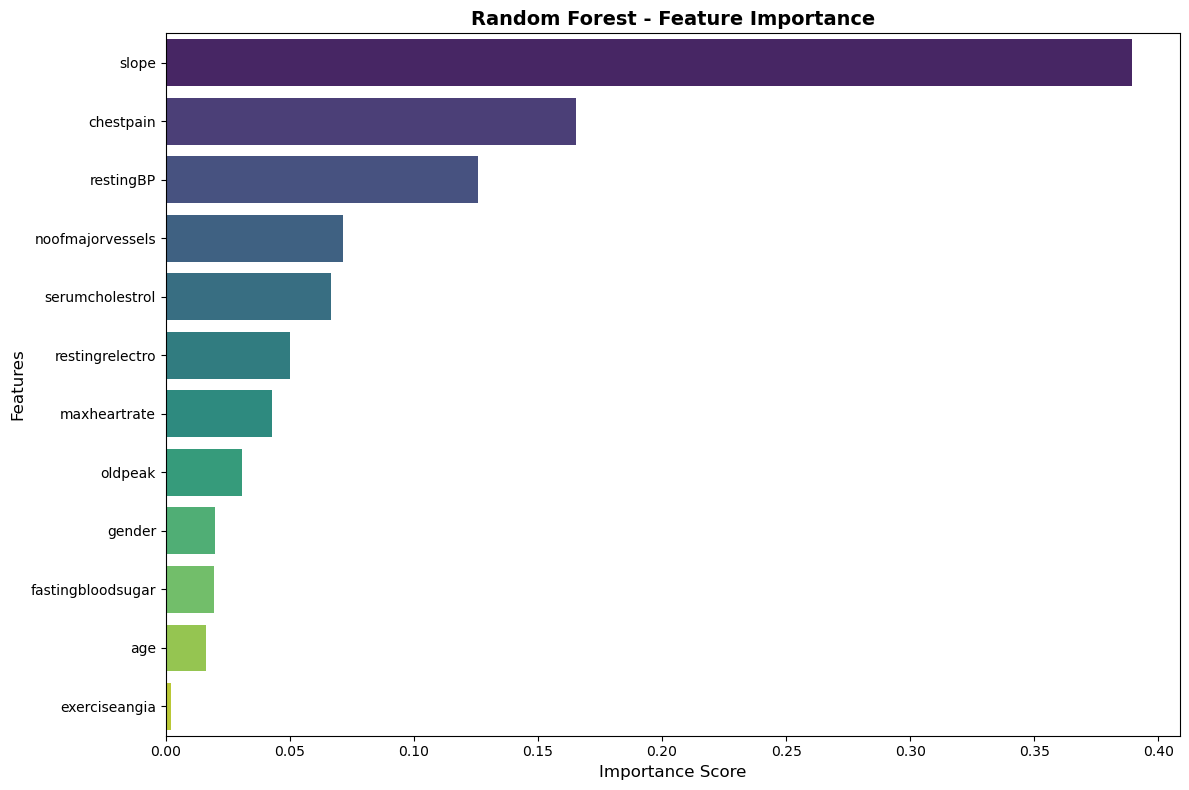

In [467]:
# Get feature importance from Random Forest
feature_importance_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Random Forest - Feature Importance:")
print(feature_importance_rf)

# Visualize feature importance
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance_rf, x='Importance', y='Feature', palette='viridis')
plt.title('Random Forest - Feature Importance', fontsize=14, fontweight='bold')
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.show()


Decision Tree - Feature Importance:
              Feature  Importance
10              slope    0.745096
3           restingBP    0.091244
4     serumcholestrol    0.051141
9             oldpeak    0.048839
2           chestpain    0.017245
7        maxheartrate    0.016173
1              gender    0.016137
0                 age    0.006167
11   noofmajorvessels    0.005356
6     restingrelectro    0.002600
5   fastingbloodsugar    0.000000
8       exerciseangia    0.000000


C:\Users\ACER\AppData\Local\Temp\ipykernel_19868\846331956.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_dt, x='Importance', y='Feature', palette='rocket')


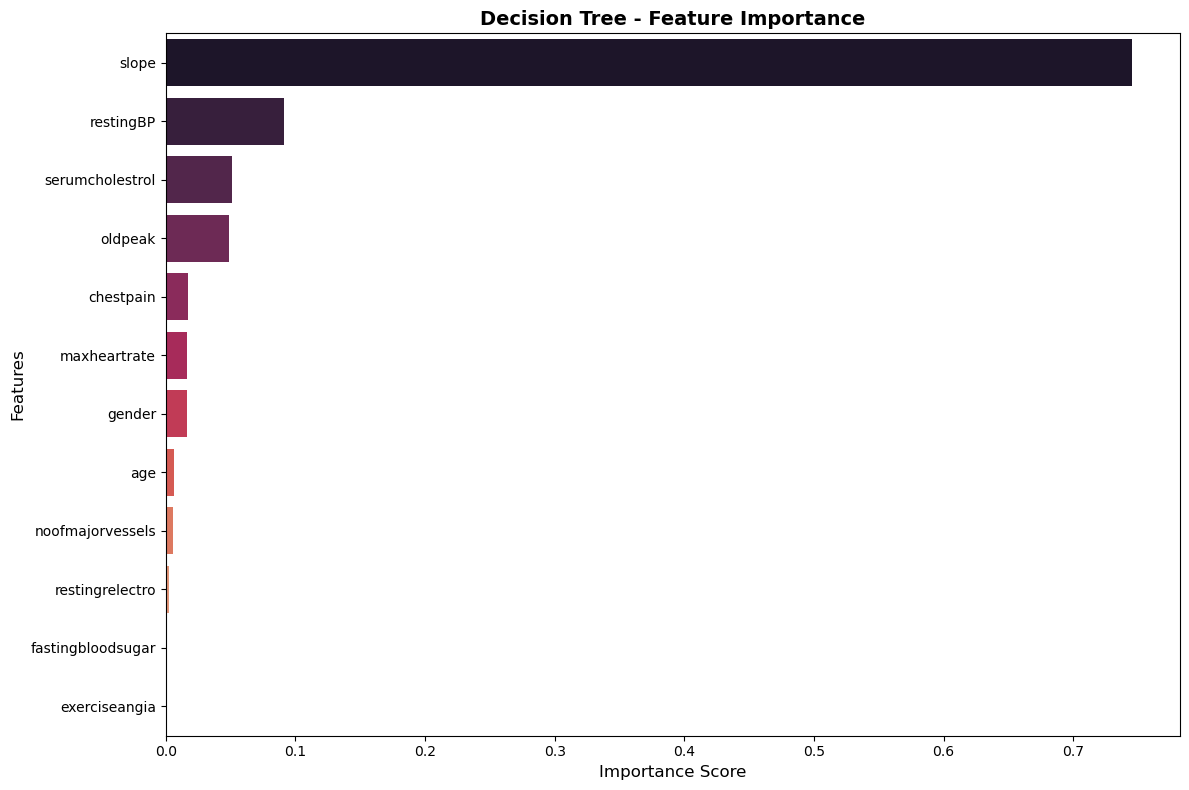

In [469]:
# Get feature importance from Decision Tree
feature_importance_dt = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Decision Tree - Feature Importance:")
print(feature_importance_dt)

# Visualize feature importance
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance_dt, x='Importance', y='Feature', palette='rocket')
plt.title('Decision Tree - Feature Importance', fontsize=14, fontweight='bold')
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.show()


In [471]:
# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Decision Tree'],
    'Accuracy': [lr_accuracy, rf_accuracy, dt_accuracy],
    'Precision': [lr_precision, rf_precision, dt_precision],
    'Recall': [lr_recall, rf_recall, dt_recall],
    'F1-Score': [lr_f1, rf_f1, dt_f1],
    'ROC-AUC': [lr_roc_auc, rf_roc_auc, dt_roc_auc]
})

print("MODEL PERFORMANCE COMPARISON")
print(comparison_df.to_string(index=False))

# Identify best model based on ROC-AUC
best_model_idx = comparison_df['ROC-AUC'].idxmax()
best_model_name = comparison_df.loc[best_model_idx, 'Model']
best_roc_auc = comparison_df.loc[best_model_idx, 'ROC-AUC']

print(f"\nBest Performing Model: {best_model_name}")
print(f"Best ROC-AUC Score: {best_roc_auc:.4f} ({best_roc_auc*100:.2f}%)")


MODEL PERFORMANCE COMPARISON
              Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC
Logistic Regression     0.985   0.982906 0.991379  0.987124 0.998153
      Random Forest     0.985   0.982906 0.991379  0.987124 0.998871
      Decision Tree     0.975   0.974359 0.982759  0.978541 0.988147

Best Performing Model: Random Forest
Best ROC-AUC Score: 0.9989 (99.89%)


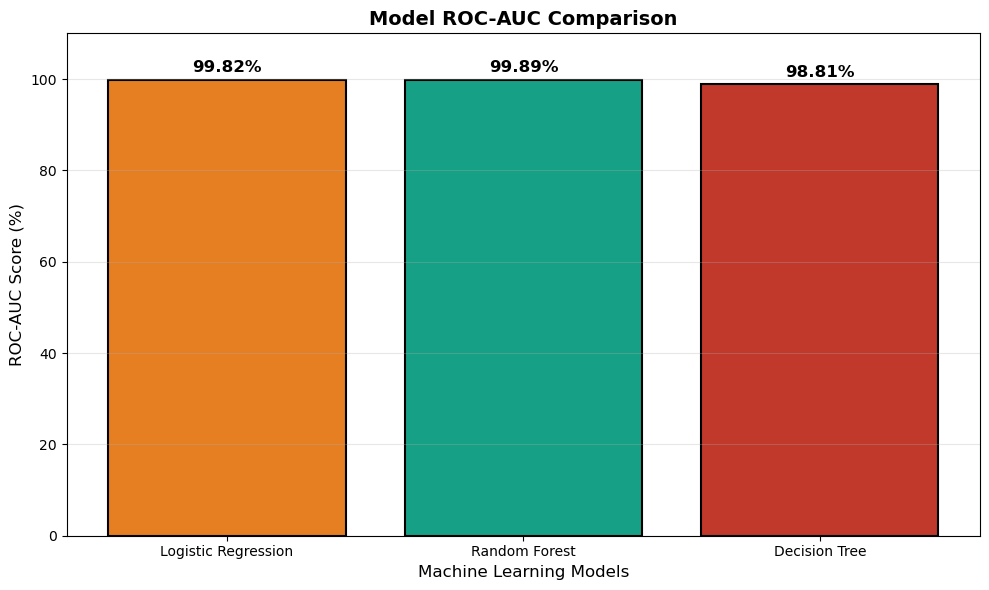

In [489]:
# Visualize ROC-AUC comparison
plt.figure(figsize=(10, 6))
roc_aucs = comparison_df['ROC-AUC'] * 100

bars = plt.bar(models, roc_aucs, color=['#e67e22', '#16a085', '#c0392b'], 
               edgecolor='black', linewidth=1.5)

# Add value labels on bars
for i, (bar, auc) in enumerate(zip(bars, roc_aucs)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
             f'{auc:.2f}%', ha='center', va='bottom', 
             fontsize=12, fontweight='bold')

plt.xlabel('Machine Learning Models', fontsize=12)
plt.ylabel('ROC-AUC Score (%)', fontsize=12)
plt.title('Model ROC-AUC Comparison', fontsize=14, fontweight='bold')
plt.ylim(0, 110)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


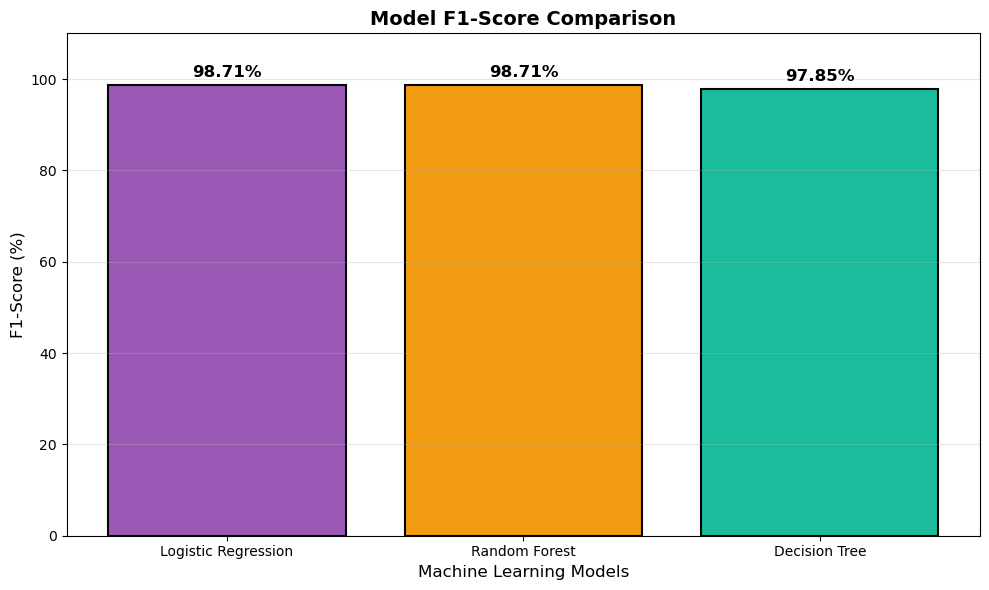

In [491]:
# Visualize F1-Score comparison
plt.figure(figsize=(10, 6))
f1_scores = comparison_df['F1-Score'] * 100

bars = plt.bar(models, f1_scores, color=['#9b59b6', '#f39c12', '#1abc9c'], 
               edgecolor='black', linewidth=1.5)

# Add value labels on bars
for i, (bar, f1) in enumerate(zip(bars, f1_scores)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
             f'{f1:.2f}%', ha='center', va='bottom', 
             fontsize=12, fontweight='bold')

plt.xlabel('Machine Learning Models', fontsize=12)
plt.ylabel('F1-Score (%)', fontsize=12)
plt.title('Model F1-Score Comparison', fontsize=14, fontweight='bold')
plt.ylim(0, 110)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


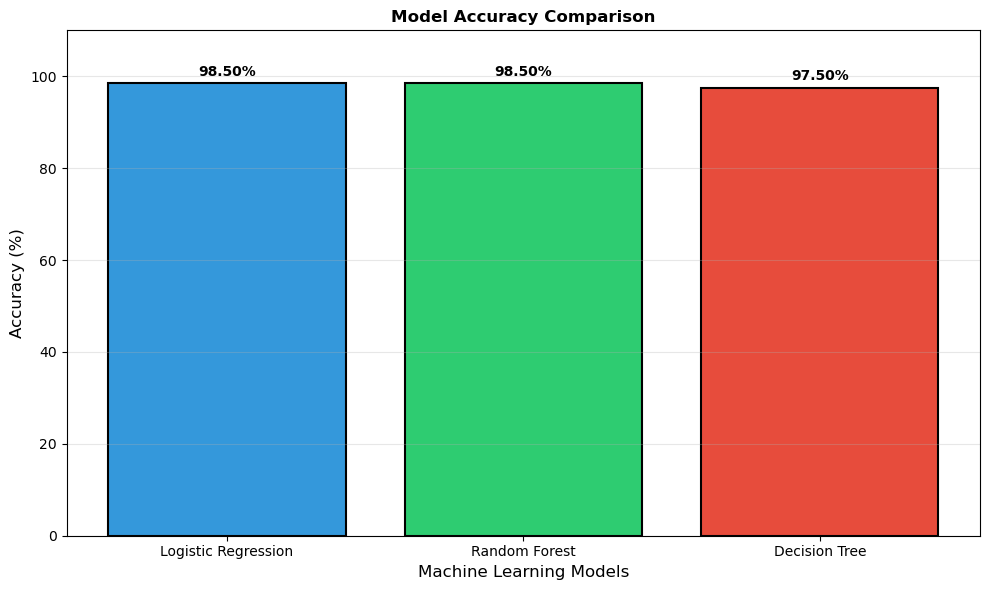

In [473]:
# Visualize accuracy comparison
plt.figure(figsize=(10, 6))
models = comparison_df['Model']
accuracies = comparison_df['Accuracy'] * 100

bars = plt.bar(models, accuracies, color=['#3498db', '#2ecc71', '#e74c3c'], 
               edgecolor='black', linewidth=1.5)

# Add value labels on bars
for i, (bar, acc) in enumerate(zip(bars, accuracies)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
             f'{acc:.2f}%', ha='center', va='bottom', 
             fontsize=10, fontweight='bold')

plt.xlabel('Machine Learning Models', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.title('Model Accuracy Comparison', fontsize=12, fontweight='bold')
plt.ylim(0, 110)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()




===ERROR METRICS (MAE & RMSE)===
              Model   MAE     RMSE
Logistic Regression 0.015 0.122474
      Random Forest 0.015 0.122474
      Decision Tree 0.025 0.158114


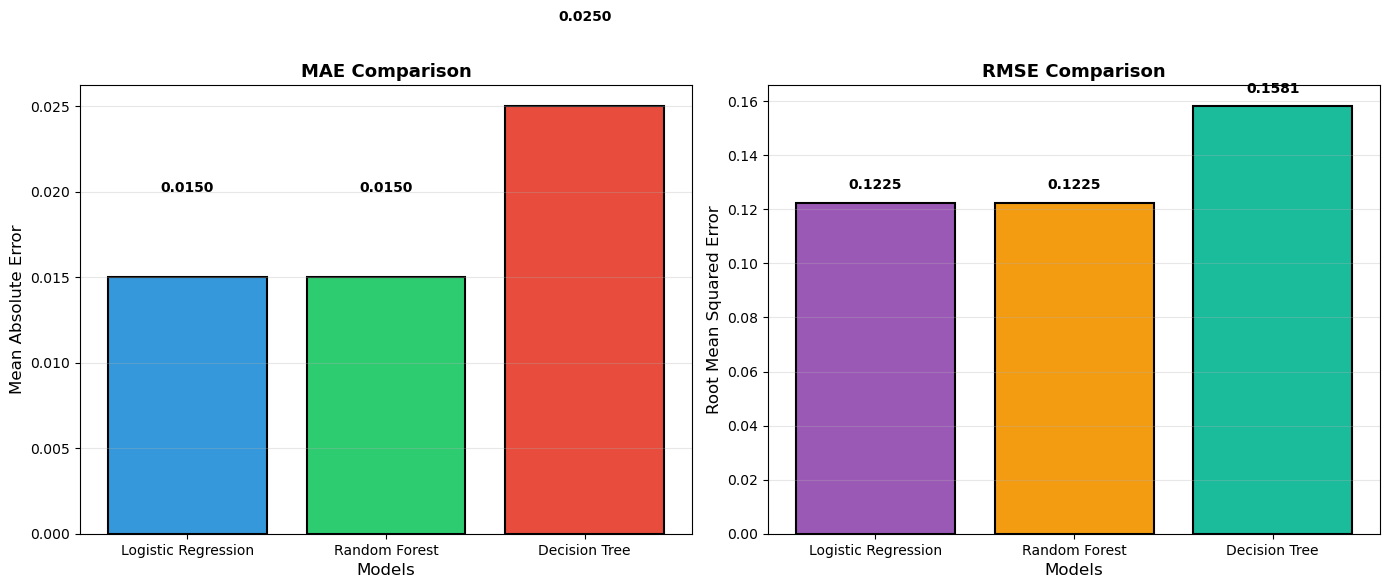

In [475]:
# Calculate MAE and RMSE for all models
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mae_dt = mean_absolute_error(y_test, y_pred_dt)

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))

# Create error metrics DataFrame
error_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Decision Tree'],
    'MAE': [mae_lr, mae_rf, mae_dt],
    'RMSE': [rmse_lr, rmse_rf, rmse_dt]
})

print("===ERROR METRICS (MAE & RMSE)===")
print(error_df.to_string(index=False))

# Visualize error metrics
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# MAE comparison
ax1.bar(error_df['Model'], error_df['MAE'], 
        color=['#3498db', '#2ecc71', '#e74c3c'], 
        edgecolor='black', linewidth=1.5)
ax1.set_xlabel('Models', fontsize=12)
ax1.set_ylabel('Mean Absolute Error', fontsize=12)
ax1.set_title('MAE Comparison', fontsize=13, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

# Add value labels
for i, (model, mae) in enumerate(zip(error_df['Model'], error_df['MAE'])):
    ax1.text(i, mae + 0.005, f'{mae:.4f}', ha='center', 
             fontsize=10, fontweight='bold')

# RMSE comparison
ax2.bar(error_df['Model'], error_df['RMSE'], 
        color=['#9b59b6', '#f39c12', '#1abc9c'], 
        edgecolor='black', linewidth=1.5)
ax2.set_xlabel('Models', fontsize=12)
ax2.set_ylabel('Root Mean Squared Error', fontsize=12)
ax2.set_title('RMSE Comparison', fontsize=13, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

# Add value labels
for i, (model, rmse) in enumerate(zip(error_df['Model'], error_df['RMSE'])):
    ax2.text(i, rmse + 0.005, f'{rmse:.4f}', ha='center', 
             fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


In [485]:

print("PREDICTION ON NEW PATIENT DATA".center(70))
print("="*70)

# Create dummy new patient
new_patient = pd.DataFrame({
    'age': [58],
    'gender': [1],  # Male
    'chestpain': [3],
    'restingBP': [145],
    'serumcholestrol': [280],
    'fastingbloodsugar': [1],
    'restingrelectro': [1],
    'maxheartrate': [138],
    'exerciseangia': [1],
    'oldpeak': [3.2],
    'slope': [2],
    'noofmajorvessels': [2]
})

print("\n Patient Profile:")
print(f"   Age: {new_patient['age'][0]} | Gender: Male | BP: {new_patient['restingBP'][0]} mmHg")
print(f"   Cholesterol: {new_patient['serumcholestrol'][0]} mg/dL | Heart Rate: {new_patient['maxheartrate'][0]} bpm")

# Scale and predict
new_patient_scaled = scaler.transform(new_patient)
prediction = rf_model.predict(new_patient_scaled)[0]
probability = rf_model.predict_proba(new_patient_scaled)[0][1] * 100

# Display result
print("\n" + "="*70)
if prediction == 1:
    print(" HIGH RISK - Cardiovascular Disease Likely")
    print(f"   Probability: {probability:.2f}%")
    print("   Recommendation: Immediate Medical Consultation Required")
else:
    print(" LOW RISK - No Disease Expected")
    print(f"   Probability: {probability:.2f}%")
    print("   Recommendation: Routine Check-up")
print("="*70 + "\n")


                    PREDICTION ON NEW PATIENT DATA                    

 Patient Profile:
   Age: 58 | Gender: Male | BP: 145 mmHg
   Cholesterol: 280 mg/dL | Heart Rate: 138 bpm

 HIGH RISK - Cardiovascular Disease Likely
   Probability: 99.50%
   Recommendation: Immediate Medical Consultation Required



C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
